# Optimizadores 1
## Gradient Descent

Debemos encontrar los valores de los parámetros que minimizan la función de costo.
Una alternativa es encontrar el mínimo de la función de costo iterativamente. Esto lo podemos hacer basándonos en los siguientes conceptos:

* Inicializamos los parámetros del modelo con un valor aleatorio: $\mathbf{\omega}(0)$
* El gradiente de la función de costo evaluado en un punto particular, nos dará la dirección de máxima variación de la función de costo. Es decir, si yo muevo al vector de parámetros en la dirección de máxima variación, el valor de la función de costo subirá a la tasa mas alta posible.
* Al contrario, si muevo al vector de parámetros en la dirección contraria, el valor de la función de costo bajará a la tasa mas alta posible: 
* Muevo los pesos muy poco en la dirección contraria a la del gradiente y vuelvo a calcular el gradiente en ese punto. $\mathbf{\omega}(k+1)=\mathbf{\omega}(k)-2\alpha\nabla(J(\mathbf{\omega}))$.
* Podemos terminar este proceso iterativo cuando $J$ sea mas chico que un valor deseado, o luego de un número de iteraciones fijo.

<img src="grad.png" alt="Mountain View" style="width:600px;height:400px;">

A este proceso para hallar el mínimo de una función se lo conoce como Batch Gradient Descent.
Para cada peso en particular, lo podemos actualizar como:

$$\omega_1(k+1)=\omega_i(k)-\alpha\frac{1}{N}\sum_{j=0}^N( \omega \mathbf x^{(j)}-y^{(j)})x^{(j)}_i$$

In [160]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline

In [161]:
# read data into a DataFrame
df = pd.read_csv("alturas-pesos.csv")
df.head()

,Sexo,Peso,Altura
0,Hombre,109,187
1,Hombre,73,174
2,Hombre,96,188
3,Hombre,99,182
4,Hombre,93,177


In [162]:
N=8000
x1=np.array(df.values[:,1])
y=df.values[:,2] #Grafico los valores que leí
import random
index=np.arange(10000)
np.random.shuffle(index)
x1_train=x1[index[:N]]
y_train=y[index[:N]]
x1_test=x1[index[N:]]
y_test=y[index[N:]]
print("x1=" + str(x1))
print("y=" + str(y))

x1=[109 73 96 ... 58 74 51]
y=[187 174 188 ... 162 175 157]


In [291]:
omega0=100 #Defino los parámetros iniciales
omega1=3.5 #Defino los parámetros iniciales
alfa=0.0003 #convergencia oscilatoria
#alfa=0.0001 #convergencia suave


In [292]:
cant_iter=20000
# Itero y me guardo el valor de los pesos paso a paso
history=np.zeros((3,cant_iter))
for l in range(cant_iter):
    J=1/N*((omega0+omega1*x1_train-y_train)**2).sum()
    history[:,l]=np.array([omega0,omega1,J])
    predict=omega0+omega1*x1_train
    error=predict-y_train
    omega0=omega0-1/N*alfa*error.sum()
    omega1=omega1-1/N*alfa*(x1_train*error).sum()

(40, 40)


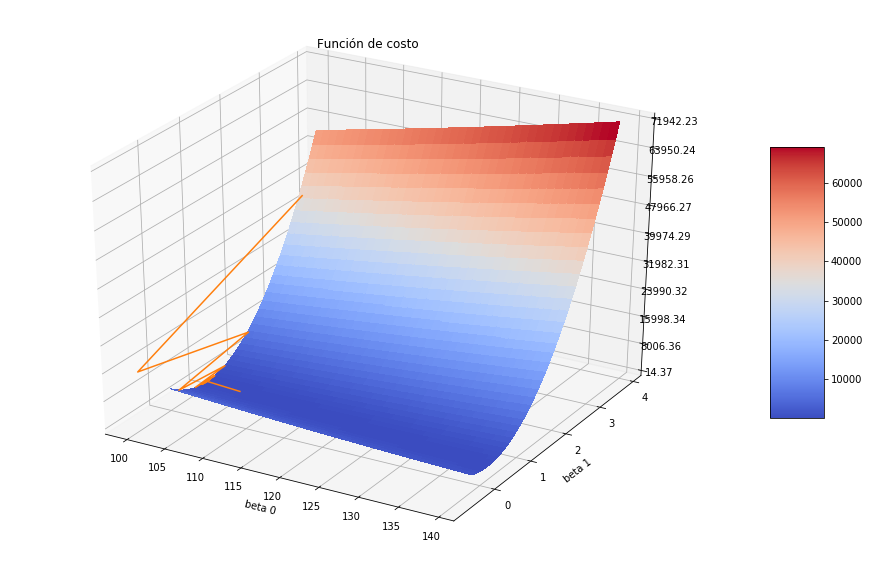

In [294]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')

# Make data.
omega0_var = np.arange(100, 140, 1)
omega1_var = np.arange(0, 4, 0.1)
omega0_var,omega1_var = np.meshgrid(omega0_var, omega1_var)
J=[(omega0_var+omega1_var*x1[i]-y[i])**2 for i in range(N)]
J=np.array(J)
J=J.mean(axis=0)        
print(J.shape)
# Plot the surface.
surf = ax.plot_surface(omega0_var, omega1_var, J, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.plot(history[0,:],history[1,:],history[2,:])
ax.set_xlabel('beta 0')
ax.set_ylabel('beta 1')
ax.set_title('Función de costo')
#ax.scatter([])
# Customize the z axis.
#ax.set_zlim(0, 1000)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

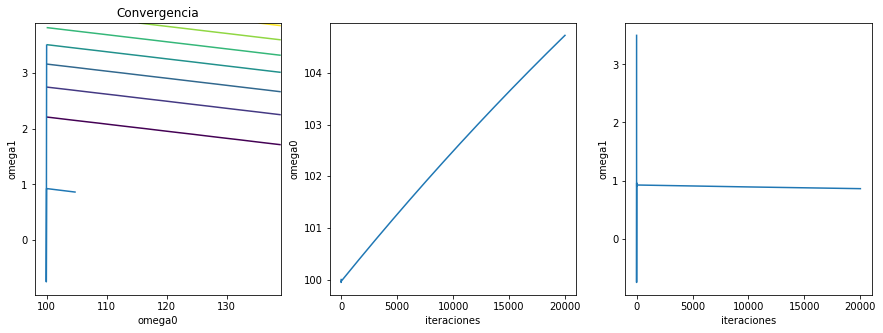

In [295]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.contour(omega0_var, omega1_var, J)
ax1.set_title('Convergencia')
ax1.set_xlabel('omega0')
ax1.set_ylabel('omega1')
ax1.plot(history[0,:],history[1,:])
ax2.plot(history[0,:])
ax2.set_xlabel('iteraciones')
ax2.set_ylabel('omega0')
ax3.plot(history[1,:])
ax3.set_xlabel('iteraciones')
ax3.set_ylabel('omega1')
plt.show()

Discusión:

Para el caso presentado, si se sube el valor de alfa, el algoritmo diverge. Por otro lado este valor de alfa hace que la convergencia del $\omega_0$ sea muy lenta (nótese que no termina de converger). ¿Qué se puede hacer para acelerar la convergencia?
Proponer modificaciones y realizarlas sobre el código.

## Stochastic Gradient Descent

Stochastic Gradient Descent es una simplificación de Batch Gradient Descent.
La misma consiste en reemplazar la función de costo total (la cual es el error cuadrático medio calculado para todo el set de muestras) por el error cuadrático instantáneo. Si hacemos esto, las ecuaciones de actualización de los pesos nos quedarán:

$$\omega_i(k+1)=\omega_i(k)-\alpha ( \omega \mathbf x^{(k)}-y^{(k)})x^{(k)}_i$$

El criterio de corte podrá ser por cantidad de iteraciones, o si el errór cuadrático instantáneo de todo un batch se mantiene por debajo de un valor predeterminado.


In [315]:
omega0=100 #Defino los parámetros iniciales
omega1=4 #Defino los parámetros iniciales
alfa=0.00025 #Defino el learning rate

In [316]:
cant_iter=3
# Itero y me guardo el valor de los pesos paso a paso
history=np.zeros((3,cant_iter*N))
for l in range(cant_iter):
    for k in range(N):
        J=1/N*((omega0+omega1*x1_train-y_train)**2).sum()
        history[:,l*N+k]=np.array([omega0,omega1,J])
        predict=omega0+omega1*x1_train[k]
        error=predict-y_train[k]
        omega0=omega0-alfa*500*error
        omega1=omega1-alfa*(x1_train[k]*error)

(40, 40)


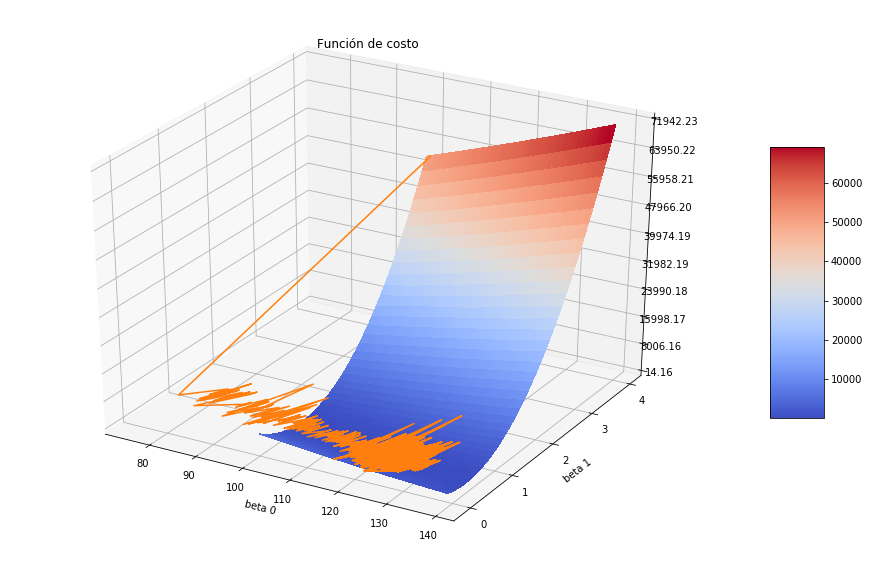

In [317]:
fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')

# Make data.
omega0_var = np.arange(100, 140, 1)
omega1_var = np.arange(0, 4, 0.1)
omega0_var,omega1_var = np.meshgrid(omega0_var, omega1_var)
J=[(omega0_var+omega1_var*x1[i]-y[i])**2 for i in range(N)]
J=np.array(J)
J=J.mean(axis=0)        
print(J.shape)
# Plot the surface.
surf = ax.plot_surface(omega0_var, omega1_var, J, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.plot(history[0,:],history[1,:],history[2,:])
ax.set_xlabel('beta 0')
ax.set_ylabel('beta 1')
ax.set_title('Función de costo')
#ax.scatter([])
# Customize the z axis.
#ax.set_zlim(0, 1000)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

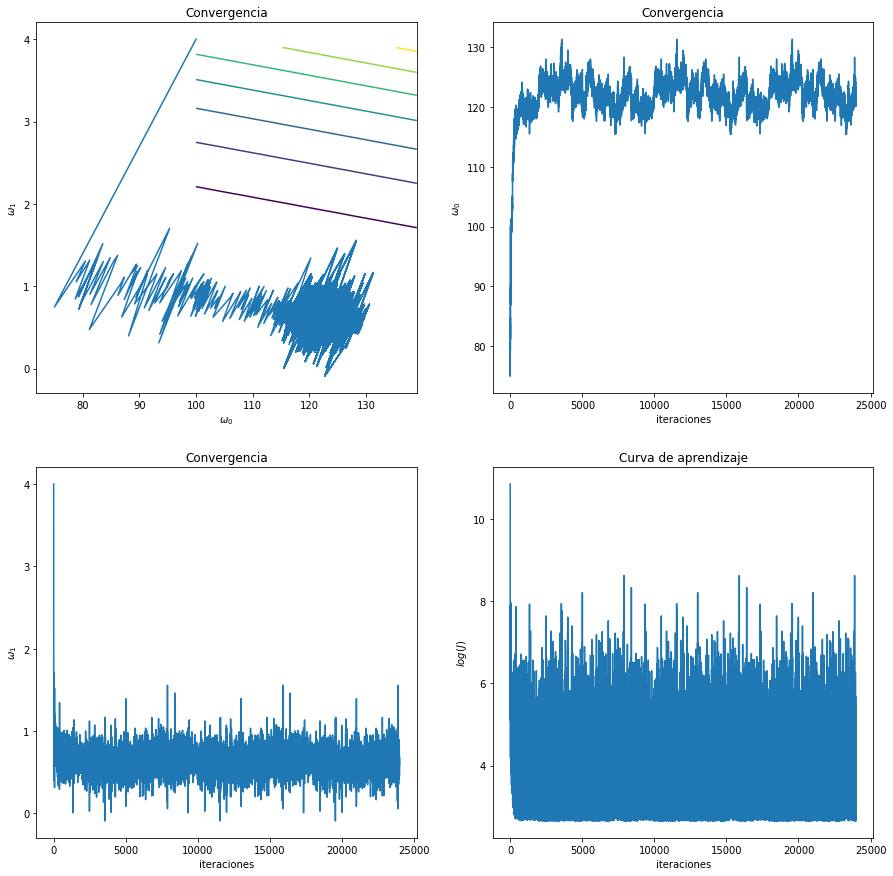

In [318]:
f, (ax1, ax2) = plt.subplots(2,2,figsize=(15,15))
ax1[0].contour(omega0_var, omega1_var, J)
ax1[0].plot(history[0,:],history[1,:])
ax1[0].set_title('Convergencia')
ax1[0].set_xlabel('$\omega_0$')
ax1[0].set_ylabel('$\omega_1$')
ax1[1].plot(history[0,:])
ax1[1].set_title('Convergencia')
ax1[1].set_ylabel('$\omega_0$')
ax1[1].set_xlabel('iteraciones')
ax2[0].plot(history[1,:])
ax2[0].set_title('Convergencia')
ax2[0].set_ylabel('$\omega_1$')
ax2[0].set_xlabel('iteraciones')
ax2[1].plot(np.log(history[2,:]))
ax2[1].set_title('Curva de aprendizaje')
ax2[1].set_ylabel('$log(J)$')
ax2[1].set_xlabel('iteraciones')
plt.show()

In [309]:
omega0

104.6602397110407

In [310]:
omega1

0.8895120426632275

## Discusión

¿Es posible implementar las modificaciones que se realizaron para Batch Gradient Descent en SGD? Realizarlas y ver qué pasa.

Para grandes volúmenes de datos se puede aplicar una solución intermedia que consiste en dividir el batch en fracciones llamadas mini-batchs.

## Minibach gradient descent

Hemos visto cómo encontrar el mínimo de la superficie de error en forma iterativa de dos formas:

- Desde la ecuación del MSE (considerando todas las observaciones), moviendo los pesos paso a paso en dirección opuesta al gradiente de la superficie del error.(Batch-GD). Este método tiene mucho cálculo ya que para cada movimiento de los pesos hay que recalcular el gradiente en base al error de todas las muestras.
- Desde el error instantáneo (considerando una sola observación), moviendo los pesos en dirección opuesta al gradiente del error instantáneo, tomando una observación distinta a cada paso. (SGD). Este método tiene 

<img src="stochastic-vs-batch-gradient-descent.png" alt="Mountain View" style="width:600px;height:400px;">


La solución provista por el primer método es mas estable ya que trabaja directamente con el gradiente de la superficie del MSE.  
El segundo método es mas ruidoso ya que solo tiene en cuenta el error instantáneo y opera sobre el supuesto de que para una gran cantidad de iteraciones, con un epsilon muy chico, se llegará al mismo mínimo que con el método anterior. En muchas iteraciones los pesos podrían moverse en dirección incluso opuesta al valor buscado. 

Una opción intermedia entre ambos métodos es utilizar el método llamado minibatch-GD. El mismo consiste en trabajar con el error cuadrático correspondiente a un número parcial de observaciones (algún número en el medio entre la totalidad de las observaciones y una sola observación). 

En definitiva todos los métodos se basan en la misma ecuación:

$$\omega_i(k+1)=\omega_i(k)-\alpha\frac{1}{N}\sum_{j=0}^N( \omega \mathbf x^{(j)}-y^{(j)})x^{(j)}_i$$

con:

BGD: N=cantidad de observaciones  
SGD: N=1  
MBGD: 1<N<cantidad de observaciones  
